# Coordinates and Dimensions of ECCOv4 NetCDF files

## Objectives

Introduce the student ot the idea that the ECCO v4 NetCDF fields have coordinate labels which shows *where* these fields are on the Arakawa-C grid.

## Introduction

As we showed in the first tutorial, we can use the `open_dataset` method from `xarray` to load a NetCDF tile file into Python as a `Dataset` object.  `open_dataset` is very convenient because it automatically parses the NetCDF file and constructs a `Dataset` object using all of the  dimensions, coordinates, variables, and metadata information.  

In the last tutorial we loaded a single ECCOv4 tile file, March 2010 average potential temperature for tile 2 (NE North Atlantic) and examined its contents.  Let's load it up again and take a closer look at its coordinates.  This time we'll name the new `Dataset` object *theta_dataset* since we are loading the file using `open_dataset`.

In [ ]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [ ]:
## Import the ecco_v4_py library into Python
## =========================================

## -- For the ECCO Summer School, use 
import ecco_v4_py as ecco

## -- If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.  For example, if your ecco_v4_py
##    files are in /Users/ifenty/ECCOv4-py/ecco_v4_py, then use:

# sys.path.append('/Users/ifenty/ECCOv4-py')
# import ecco_v4_py as ecco

In [10]:
## Tell Python where to find some ECCO NetCDF tile fields (Format 1)
## =================================================================

## -- For the ECCO Summer School, use
base_dir = '/work/projects/aci/ECCO/community/ECCO/ECCOv4/Release3p1'

## -- If files are on a local machine, use something like 
#base_dir = '/Users/ifenty/'

ECCO_dir = base_dir + '/eccov4r3_native_grid_netcdf_tiles/'

In [11]:
## LOAD NETCDF FILE
## ================

# directory of the file
data_dir= ECCO_dir + '/mon_mean/THETA/2010/03/'

# filename
fname = 'THETA_2010_03_tile_02.nc'

# load the dataset file using xarray
theta_dataset = xr.open_dataset(data_dir + fname).load()

Before we get started, plot the temperature field at the surface layer (k=0) for tile 2, NE Atlantic..

> Note :: Don't worry about the complicated looking code below, w'll cover plotting later

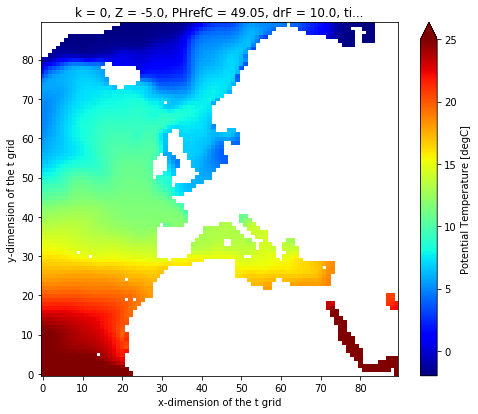

In [3]:
fig=plt.figure(figsize=(8, 6.5))
td_masked = theta_dataset.THETA.where(theta_dataset.hFacC > 0, np.nan)
td_masked.isel(k=0).plot(cmap='jet', vmin=-2,vmax=25)

## The Dimensions and Coordinates of *THETA*

In [4]:
theta_dataset.attrs = []
theta_dataset

<xarray.Dataset>
Dimensions:    (i: 90, j: 90, k: 50, nv: 2)
Coordinates:
    XC         (j, i) float32 -37.5 -36.5 -35.5 ... 50.968143 51.44421 51.837925
    YC         (j, i) float32 10.458642 10.458642 ... 67.53387 67.47211
    rA         (j, i) float32 11896091000.0 11896091000.0 ... 212633870.0
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    hFacC      (k, j, i) float32 1.0 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    time_bnds  (nv) datetime64[ns] 2010-03-01 2010-04-01
    tile       int32 2
    iter       int32 159948
    time       datetime64[ns] 2

### Dimensions

*theta_dataset* shows four dimensions, **i**, **j**, **k**, and **nv**.  Recall that ``Dataset`` objects are containers and so it lists all of the  **unique** dimensions of the variables it is storing.  *theta_dataset* is storing a single *Data variable*, *THETA*.  We see that this *THETA* field is three dimensional from the (**k**, **j**, **i**) in the line:
~~~
THETA      (k, j, i) float32 26.663628 26.587461 26.537895 ... 0.0 0.0 0.0
~~~

Examining the coordinates of the ``Dataset``, we find that all of them have some combination of **i**, **j**, **k**, or none except *time_bnds* which has dimension **nv**.  This **nv** dimension is not a spatial dimension, *time_bnds* is a 1x2 array with **nv** as the name of its second dimension.

### Coordinates

#### Dimension Coordinates

Beyond having three spatial dimensions *theta_dataset* also has *coordinates* in the **i**, **j**, and **k** directions.  The most basic coordinates are 1D vectors, one for each dimension, which contain *indices* for the array.  Let us call these basic coordinates, *dimension coordinates*.  Here we use 0 as the first index of dimension coordinates
```
* i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
* j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
* k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
```

Let's examine each *Dimension Coordinate* more closely

##### Dimension Coordinate ``i``

In [5]:
theta_dataset.i

<xarray.DataArray 'i' (i: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype=int32)
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int32 2
    iter     int32 159948
    time     datetime64[ns] 2010-03-16T12:00:00
Attributes:
    long_name:      x-dimension of the t grid
    standard_name:  x_grid_index
    swap_dim:       XC
    axis:           X

*i* is an array of integers from 0 to 89 indicating the *x_grid_index* along this tile's *X* axis.

##### Dimension Coordinate ``j``

In [6]:
theta_dataset.j

<xarray.DataArray 'j' (j: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype=int32)
Coordinates:
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int32 2
    iter     int32 159948
    time     datetime64[ns] 2010-03-16T12:00:00
Attributes:
    long_name:      y-dimension of the t grid
    standard_name:  y_grid_index
    swap_dim:       YC
    axis:           Y

*j* is an array of integers from 0 to 89 indicating the *y_grid_index* along this tile's *Y* axis.

##### Dimension Coordinate ``k``

In [7]:
theta_dataset.k

<xarray.DataArray 'k' (k: 50)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int32)
Coordinates:
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    Z        (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC   (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF      (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    tile     int32 2
    iter     int32 159948
    time     datetime64[ns] 2010-03-16T12:00:00
Attributes:
    long_name:      z-dimension of the t grid
    standard_name:  z_grid_index
    swap_dim:       Z
    axis:           Z

*k* is an array of integers from 0 to 49 indicating the *z_grid_index* along this tile's *Z* axis.


#### Other Coordinates

Notice some *coordinates* do not have an **"\*"** in front of their names:
```             
Coordinates:
    XC         (j, i) float32 -37.5 -36.5 -35.5 ... 50.968143 51.44421 51.837925
    YC         (j, i) float32 10.458642 10.458642 ... 67.53387 67.47211
    rA         (j, i) float32 11896091000.0 11896091000.0 ... 212633870.0
    hFacC      (k, j, i) float32 1.0 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    time_bnds  (nv) datetime64[ns] 2010-03-01 2010-04-01
    tile       int32 2
    iter       int32 159948
    time       datetime64[ns] 2010-03-16T12:00:00
```

These are so-called [non-dimension coordinates](http://xarray.pydata.org/en/stable/data-structures.html#coordinates).  From the xarray documenation:

```
1. non-dimension coordinates are variables that [may] contain coordinate data, 
   but are not a dimension coordinate. 

2. They can be multidimensional ... and there is no relationship between 
   the name of a non-dimension coordinate and the name(s) of its dimension(s). 

3. Non-dimension coordinates can be useful for indexing or plotting; ...
```

Four of these variables contain spatial coordinate data:

* **XC** and **YC**, the longitude and latitudes of the 'c' points (varies with **i** and **j**)
* **Z** the center depth of tracer cells (varies only with **k**)
* **PHrefC**, a reference pressure of tracer cells (varies only with **k**)

Two of these variables have *spatial dimensions* but are not coordinates in a tradiational sense:

* **hFacC**, the fraction (0,1) of a tracer grid cell height which is wet (varies with **k**, **j**, and **i**) 
* **drF**, the distance between the top and bottom of a tracer grid cell (varies only with **k**)

Three non-dimension coordinates do not have any spatial dimensions!  

* **tile**, values of the current llc90 tile index.
* **iter**, the time step of the model (time iteration) when the record was saved 
* **time**, a calendar date and time 
* **time_bnds**, a 1x2 array of calendar dates and times indicating the start and end times of the averaging period of the field

When multiple DataArrays from different tiles and times are combined, the dimensions of the merged arrays will expand along the **time** and **tile** dimensions.   

Let's quickly look at the **time** coordinate

In [8]:
theta_dataset.time

<xarray.DataArray 'time' ()>
array('2010-03-16T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    tile     int32 2
    iter     int32 159948
    time     datetime64[ns] 2010-03-16T12:00:00
Attributes:
    long_name:      center time of averaging period
    standard_name:  time
    bounds:         time_bnds
    axis:           T

In this file the **time** coordinate indicates the *center time of the averaging period*.  Recall that we loaded the monthly-mean ``THETA`` fields for March 2010, so the *center time of the averaging period* for this file is March 16, 12:00, 2010.

Let's quickly look at the **time_bnds** coordinate:

In [9]:
theta_dataset.time_bnds

<xarray.DataArray 'time_bnds' (nv: 2)>
array(['2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_bnds  (nv) datetime64[ns] 2010-03-01 2010-04-01
    tile       int32 2
    iter       int32 159948
    time       datetime64[ns] 2010-03-16T12:00:00
Dimensions without coordinates: nv
Attributes:
    long_name:      time bounds of averaging period
    standard_name:  time_bounds

For time-averaged fields, **time_bnds** is a 2D array provding the *start* and *end* time of the averaging period.  As this is a monthly-mean field for March, the *start* time is 2010-03-01 and the end time is 2010-04-01. 

time-averaging period, March 1, 00:00 to Apri 1, 00:00, 2010
~~~
start time : 2010-03-01T00:00:00.000000000  
  end time : 2010-04-01T00:00:00.000000000
~~~
  
Having this information readily available can be very helpful.

## The Dimension Coordinates of the Arakawa C-Grid

Dimension coordinates have special meanings.  The MITgcm uses the staggered Arakawa-C grid (hereafter c-grid). In c-grid models, variables are staggered in space.  Horizontally, variables are associated with three 'locations': 

1. tracer cells (e.g. temperature, salinity, density)
2. the 4 lateral faces of tracer cells (e.g., horizontal velocities and fluxes) 
3. the 4 corners of tracer cells (e.g., vertical component of vorticity field)

Vertically, there are also two 'locations': 

1. tracer cells
2. the 2 top/bottom faces of tracer cells (e.g., vertical velocities and fluxes).

To understand this better, let's review the geometry of c-grid models.

### 3D staggering of velocity components. 

Paraphrasing from https://mitgcm.readthedocs.io/en/latest/algorithm/c-grid.html,

~~~
In c-grid models, the components of flow (𝑢,𝑣,𝑤) are staggered in 
space such that the zonal component falls on the interface between 
tracer cells in the zonal direction. Similarly for the meridional 
and vertical directions. 
~~~

#### Why the c-grid?

~~~
The basic algorithm employed for stepping forward the momentum 
equations is based on retaining non-divergence of the flow at 
all times. This is most naturally done if the components of flow
are staggered in space in the form of an Arakawa C grid...
~~~

![uvw-grid](../figures/uvw.png )


### Defining the c-grid coordinate system

As shown, variables on Arakawa-C grids (c-grid) are staggered in space.  For convenience we  define a coordinate system that distinguishes between these different locations.

#### The c-grid horizontal coordinates

In the horizontal, variables can take one of four locations: **c**, **u**, **v**, or **g**.  

![c-grid](../figures/C-grid-points.png )


##### horizontal "c" location

Variables associated with tracer cell area or volumetric averages (e.g., temperature, salinity, sea ice thickness, air-sea net heat flux) and variables associated with vertical velocities (e.g., $\vec w$) are identified with **c** locations.

For these variables we define the horizontal dimensions of **i** and **j**, corresponding with the model grid $x$ and $y$ directions, respectively.  

##### horizontal "u" location

Variables associated with the two lateral sides of tracer cells in the $x$ direction are identified with **u** locations. 

Define the horizontal dimensions of **u** variables as **i_g** and **j**, corresponding with the model's $x$ and $y$ dimensions, respectively.  

> **Important Note**: In the llc90 curvilinear model grid used by ECCOv4, the $x$ direction is **NOT** same as the geographic zonal (east-west) direction.

##### horizontal "v" location

Variables associated with the two lateral sides of tracer cells in the $y$ direction are identified with **v** locations. 

Define the horizontal dimensions of **v** variables as **i** and **j_g**, corresponding with the model's $x$ and $y$ dimensions, respectively.

> **Important Note**: In the llc90 curvilinear model grid used by ECCOv4, the $y$ direction is **NOT** same as the geographic meridional (north-south) direction.


##### horizontal "g" location

Variables associated with the horizontal corners of tracer grid cells are identified with **g** locations.

Define the horizontal dimensions of **g** variables as **i_g** and **j_g**, corresponding with the model's $x$ and $y$ dimensions, respectively.  

#### The c-grid vertical coordinates

In the horizontal, variables can take one of two locations: **c** and **w**

#### vertical "c" location

Variables associated with tracer cell volumetric quantities (e.g., temperature, salinity) are identified with **c** locations.

For these variables we define the vertical dimensions of **k** which corresponds with the model grid' $z$ direction.

#### vertical "w" location

Variables associated with the two top/bottom sides of tracer cells in the $z$ direction are identified with **w** locations. 

For these variables we define the vertical dimension of **$k_u$** to indicate the model tracer cell's **u**pper faces in the $k$ direction, respectively.  

Two other vertical dimensions are also used.  **$k_l$** indicates the model tracer cell's **l**ower faces, and $k_{p1}$ which index all of the **upper** and **lower** faces.  

> Note: In ECCOv4 NetCDF files both **$k_u$**(0) and **$k_{p1}$**(0) correspond to the same top face of the model tracer grid cell.

## All ECCOv4 coordinates

Now that we have been oriented to the dimensions and coordinates used by ECCOv4, let's load up and examinea a ``Dataset`` that uses all of them, an ECCOv4 NetCDF grid file. 

Open the ECCOv4 grid file associated with tile 2:

In [12]:
grid_dir = ECCO_dir + '/grid/'
grid_name = 'ECCOv4r3_grid_tile_02.nc'
grid_dataset = xr.open_dataset(grid_dir + grid_name).load()
grid_dataset.attrs =[]
grid_dataset.coords

Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    tile     int64 2
    XC       (j, i) float32 -37.5 -36.5 -35.5 ... 50.968143 51.44421 51.837925
    YC       (j, i) float32 10.458642 10.458642 10.458642 ... 67.53387 67.47211
    XG       (j_g, i_g) float32 -38.0 -37.0 -36.0 ... 51.118958 51.588932
    YG       (j_g, i_g) float32 9.96973 9.96973 9.96973 ... 67.49435 67.42869
    Zl       (k_l) 

### Dimensions
`Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50)`

The *Dimensions* list now lists the six different coordinates and their dimension used by variables stored in this new grid tile `Dataset` object.  

### Dimension Coordinates 


```
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
``` 

We note that horizontal coords have 90 indices [0..89], $k_u$ and $k_l$ have 50 [0..49] and k_{p1} has 51 [0..50]


### Non-Dimension Coordinates

Some non-dimension coordinates are spatial coordinates.
* XC, YC : longitude and latitude of tracer cell centers
* XG, YG : longitude and latitude of tracer cell corners
* Z_l, Z_u, Z_p1 : depths of tracer cell lower and upper faces
* Z : depths of tracer cell centers
* PHrefC, PHrefF : reference pressures at tracer cell centers and upper and lower faces

```
    XC       (j, i) float32 ...
    YC       (j, i) float32 ...
    XG       (j_g, i_g) float32 ...
    YG       (j_g, i_g) float32 ...
    Zl       (k_l) float32 ...
    Zu       (k_u) float32 ...
    Z        (k) float32 ...
    Zp1      (k_p1) float32 ...
    PHrefC   (k) float32 ...
    PHrefF   (k_p1) float32 ...
```

While others describe the model grid geometry (areas, distances, distances, and geometric factors) and other information (model depth).  They are not coordinates in any meaningful sense but they *are essential for quantitative analysis*. 

horizontal distances:
```
    dxG      (j_g, i) float32 ...
    dyG      (j, i_g) float32 ...
    dxC      (j, i_g) float32 ...
    dyC      (j_g, i) float32 ...
```

vertical distances:
```
    drC      (k_p1) float32 ...
    drF      (k) float32 ...
```        

areas:
```
    rAs      (j_g, i) float32 ...
    rAw      (j, i_g) float32 ...
    rA       (j, i) float32 ...
    rAz      (j_g, i_g) float32 ...
```

geometric factors
```
    hFacS    (k, j_g, i) float32 ...
    hFacC    (k, j, i) float32 ...
    hFacW    (k, j, i_g) float32 ...
```    

seafloor depth
```
Depth    (j, i) float32 ...
```

These ancilliary fields are classified as non-dimension coordinates because we wanted to reserve *data variables* for variables that are part of the model solution.

In the end, it doesn't matter what you call these ancillary variables -- what matters is that you have them on hand for calculations.  If it makes you feel beter, use the function ``.reset_coords()`` to convert all non-dimension coordinates to data variables.  
~~~
grid_dataset.reset_coords()
~~~

### Model Grid Geometry Fields 

Let's examine one of these grid geometric variables, *dxG*:

In [11]:
grid_dataset.dxG

<xarray.DataArray 'dxG' (j_g: 90, i: 90)>
array([[109498.625, 109498.625, 109498.625, ..., 109498.625, 109498.625,
        109498.625],
       [109153.875, 109153.875, 109153.875, ..., 109153.875, 109153.875,
        109153.875],
       [108776.664, 108776.664, 108776.664, ..., 108776.664, 108776.664,
        108776.664],
       ...,
       [ 24995.342,  26019.037,  27603.951, ...,  27603.951,  26019.037,
         24995.342],
       [ 21862.79 ,  23614.71 ,  25916.31 , ...,  25916.31 ,  23614.71 ,
         21862.79 ],
       [ 17873.049,  21326.564,  24596.092, ...,  24596.092,  21326.564,
         17873.049]], dtype=float32)
Coordinates:
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int64 2
    rAs      (j_g, i) float32 11884406000.0 11884406000.0 ... 335292540.0
    dxG      (j_g, i) float32 109498.625 109498.625 ... 21326.564 17873.049
    dyC      (j_g, i) f

*dxG* has coordinates $i$ and $j_g$, which means that it is a **v** location variable.  *dxG* is the horizontal distance between $g$ points (tracer cell corners) in the tile's $x$ direction.  

For reference, see the chart below from the MITgcm documentation, [Figure 2.6](https://mitgcm.readthedocs.io/en/latest/algorithm/horiz-grid.html "Fig 2.6")

dxG = $\Delta x_g$ in subfigure (a) below:

![hgrid](../figures/hgrid-abcd.svg)

*Figure 2.6 Staggering of horizontal grid descriptors (lengths and areas). The grid lines indicate the tracer cell boundaries and are the reference grid for all panels. a) The area of a tracer cell, 𝐴𝑐, is bordered by the lengths Δ𝑥𝑔 and Δ𝑦𝑔. b) The area of a vorticity cell, 𝐴𝜁, is bordered by the lengths Δ𝑥𝑐 and Δ𝑦𝑐. c) The area of a u cell, 𝐴𝑤, is bordered by the lengths Δ𝑥𝑣 and Δ𝑦𝑓. d) The area of a v cell, 𝐴𝑠, is bordered by the lengths Δ𝑥𝑓 and Δ𝑦𝑢.*

## Dimensions and Coordinates of *UVEL*

So far we looked *THETA* which is a $c$ variable.  Let's examine *UVEL*, horizontal velocity in the tile's $x$ direction.  As you've probably guessed, *UVEL* is a $u$ variable: 

Load tile 2 of the 2010 March average horizonatal velocity in the $x$ direction.

In [13]:
# Directory of the UVEL files
data_dir= ECCO_dir + '/mon_mean/UVEL/2010/03/'

fname = 'UVEL_2010_03_tile_02.nc'
uvel_dataset = xr.open_dataset(data_dir + fname).load()
uvel_dataset.attrs = []

### ``UVEL`` context

Plot the time-mean horizontal velocity at the top-most model grid cell in the tile's $x$ direction

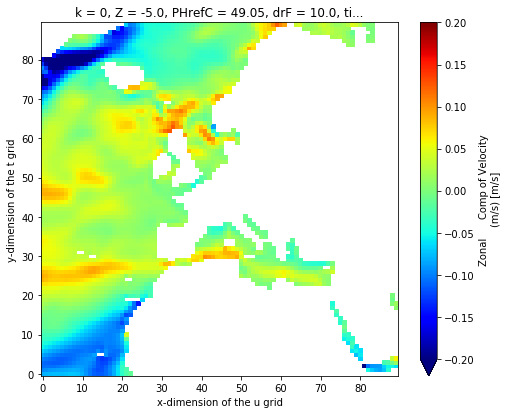

In [14]:
fig=plt.figure(figsize=(8, 6.5))
ud_masked = uvel_dataset.UVEL.where(uvel_dataset.hFacW > 0, np.nan)
ud_masked.isel(k=0).plot(cmap='jet', vmin=-.2,vmax=.2)

Let's look at the dimensions and coordinates of *UVEL*

In [14]:
uvel_dataset.data_vars

Data variables:
    UVEL     (k, j, i_g) float32 -0.08147599 -0.07893662 -0.0776869 ... 0.0 0.0

In [15]:
uvel_dataset.coords

Coordinates:
    dxC        (j, i_g) float32 109330.39 109330.39 ... 22498.332 18116.71
    rAw        (j, i_g) float32 11896091000.0 11896091000.0 ... 292185820.0
    dyG        (j, i_g) float32 108810.11 108810.11 ... 19713.574 15965.378
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    hFacW      (k, j, i_g) float32 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    time_bnds  (nv) datetime64[ns] 2010-03-01 2010-04-01
    tile       int32 2
    iter       int32 159948
    time       datetime64[ns] 2010-03-16T12:00:00

### Dimension coordinates

As expected, *UVEL* has horizontal dimensions of **i_g, j**. Because *UVEL* is the velocity  at the left and right faces of 3D tracer cells we use **k** for its vertical coordinate.

~~~
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
~~~

## Dimensions and Coordinates of *VVEL*

Finally, let's examine *VVEL*, horizontal velocity in the tile's $y$ direction.  As you've probably guessed, *VVEL* is a $v$ variable: 

Load tile 2 of the 2010 March average horizonatal velocity in the $y$ direction.

In [15]:
# Directory of the VVEL files
data_dir= ECCO_dir + '/mon_mean/VVEL/2010/03/'

fname = 'VVEL_2010_03_tile_02.nc'
vvel_dataset = xr.open_dataset(data_dir + fname).load()
vvel_dataset.attrs = []

### ``VVEL`` context

Plot the time-mean horizontal velocity in the tile's $y$ direction at model level 5 (55m) 

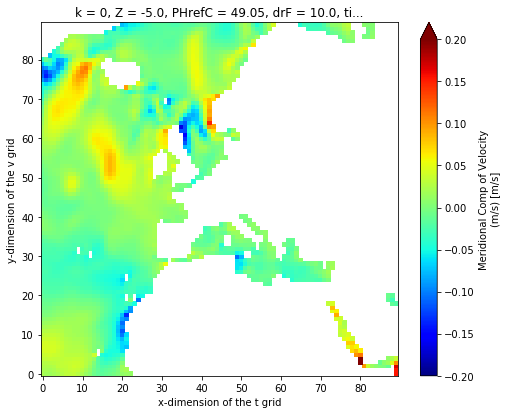

In [16]:
fig=plt.figure(figsize=(8, 6.5))
vd_masked = vvel_dataset.VVEL.where(vvel_dataset.hFacS > 0, np.nan)
vd_masked.isel(k=0).plot(cmap='jet', vmin=-.2,vmax=.2)

In [18]:
vvel_dataset.data_vars

Data variables:
    VVEL     (k, j_g, i) float32 0.022591135 0.018273398 0.016787423 ... 0.0 0.0

In [19]:
vvel_dataset.coords

Coordinates:
    rAs        (j_g, i) float32 11884406000.0 11884406000.0 ... 335292540.0
    dxG        (j_g, i) float32 109498.625 109498.625 ... 21326.564 17873.049
    dyC        (j_g, i) float32 108536.33 108536.33 ... 18723.23 15461.596
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    hFacS      (k, j_g, i) float32 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    time_bnds  (nv) datetime64[ns] 2010-03-01 2010-04-01
    tile       int32 2
    iter       int32 159948
    time       datetime64[ns] 2010-03-16T12:00:00

### Dimension coordinates

As expected, *VVEL* has horizontal dimensions of **i, j_g**. Because *VVEL* is the velocity at the front and rear faces of 3D tracer cells we use **k** for its vertical coordinate.

~~~
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
~~~

## Summary

ECCOv4 variables are on the staggered Arakawa-C grid.  Different dimension labels and coordinates are applied to state estimate variables so that one can easily identify where on the c-grid any particular variable is situated.
